# $k$-Means++

## By: Grace Hill and Meet Patel

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

### DrivFace

In [3]:
df = pd.read_csv("DrivFace/drivPoints.csv")
df.drop("fileName", axis = 1, inplace = True)

In [4]:
df

,subject,imgNum,label,ang,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,1,1,2,0,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,1,2,2,0,286,200,109,128,324,235,366,235,353,258,333,281,361,281
2,1,3,2,0,290,204,105,121,325,240,367,239,351,260,334,282,362,282
3,1,4,2,0,287,202,112,118,325,230,369,230,353,253,335,274,362,275
4,1,5,2,0,290,193,104,119,325,224,366,225,353,244,333,268,363,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,4,86,2,-15,278,183,128,141,307,218,354,210,330,247,324,273,356,266
602,4,87,1,-30,268,186,128,134,296,222,344,212,319,247,316,274,347,269
603,4,88,1,-30,264,187,127,131,287,220,334,211,304,247,305,272,337,270
604,4,89,2,-15,264,175,143,136,295,207,345,200,320,234,314,261,351,251


In [24]:
df.var()

subject       1.089960
imgNum     2427.905998
label         0.099075
ang         204.992226
xF          354.092936
yF         1554.186676
wF           51.614546
hF           73.495808
xRE         421.548417
yRE        1460.034302
xLE         391.366489
yLE        1634.342460
xN          589.867998
yN         1554.672626
xRM         360.593953
yRM        1531.108990
xLM         366.839989
yLM        1685.350978
dtype: float64

In [31]:
inertias = []
for i in range(1,10):
    drivface_model = KMeans(n_clusters = i).fit(df)
    inertias.append(drivface_model.inertia_)

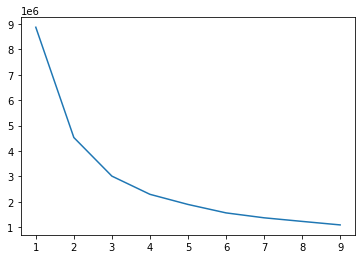

In [33]:
plt.plot(np.arange(1, 10), inertias)

In [52]:
drivface_model = KMeans(n_clusters = 3, init = 'random', verbose = True).fit(df)
drivface_model.inertia_

Initialization complete
Iteration 0, inertia 4157070.0
Iteration 1, inertia 3031082.555366978
Iteration 2, inertia 3018628.205784574
Iteration 3, inertia 3014893.0009702137
Iteration 4, inertia 3013994.3676561983
Iteration 5, inertia 3013060.1861690325
Iteration 6, inertia 3012872.2512446484
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 10715314.0
Iteration 1, inertia 6178848.003905304
Iteration 2, inertia 3323073.5120488415
Iteration 3, inertia 3037888.3802205403
Iteration 4, inertia 3028674.7817208003
Iteration 5, inertia 3028620.0165454587
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 7096170.0
Iteration 1, inertia 4056305.652923344
Iteration 2, inertia 3823373.8294029892
Iteration 3, inertia 3379346.88885035
Iteration 4, inertia 3094700.61376093
Iteration 5, inertia 3045415.957903859
Iteration 6, inertia 3029550.898565577
Iteration 7, inertia 3021092.1540598096
Iteration 8, inertia 3015183.011

3012872.2512446484

### Concentric Circles Synthetic Dataset

In [6]:
conc_circ_outer_x = np.random.rand(100)

In [7]:
conc_circ_outer_y = np.sqrt(1 - np.power(conc_circ_outer_x, 2))

In [8]:
for idx in range(len(conc_circ_outer_x)):
    if np.random.rand() > 0.5:
        conc_circ_outer_x[idx] *= -1
for idx in range(len(conc_circ_outer_y)):
    if np.random.rand() > 0.5:
        conc_circ_outer_y[idx] *= -1

In [9]:
conc_circ_outer_x *= 5
conc_circ_outer_y *= 5

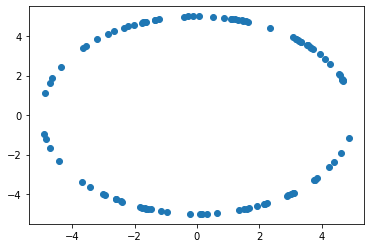

In [10]:
plt.scatter(conc_circ_outer_x, conc_circ_outer_y)

In [11]:
conc_circ_inner_theta = np.random.rand((100)) * (2 * np.pi)
conc_circ_inner_r = np.random.rand(100)
conc_circ_inner_x, conc_circ_inner_y = conc_circ_inner_r * np.cos(conc_circ_inner_theta), conc_circ_inner_r * np.sin(conc_circ_inner_theta)

In [12]:
conc_circ_x = np.append(conc_circ_inner_x, conc_circ_outer_x)
conc_circ_y = np.append(conc_circ_inner_y, conc_circ_outer_y)

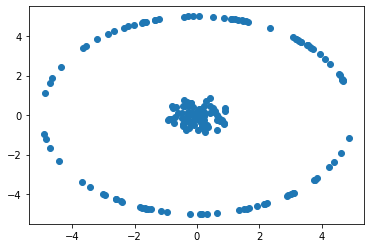

In [13]:
plt.scatter(conc_circ_x, conc_circ_y)

In [49]:
conc_circ_model = KMeans(n_clusters = 2, init = 'random', verbose = True).fit(list(zip(conc_circ_x, conc_circ_y)))

Initialization complete
Iteration 0, inertia 2231.9371793961277
Iteration 1, inertia 1616.3836907269936
Iteration 2, inertia 1550.4651487277047
Iteration 3, inertia 1545.2420231694323
Iteration 4, inertia 1543.614647409141
Iteration 5, inertia 1542.546718976295
Iteration 6, inertia 1541.5569621448003
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2115.7796729620595
Iteration 1, inertia 1546.5200346468541
Iteration 2, inertia 1541.5569621448003
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2227.3368991688203
Iteration 1, inertia 1683.0488447139016
Iteration 2, inertia 1551.012473893249
Iteration 3, inertia 1543.978424028528
Iteration 4, inertia 1542.5367598812002
Iteration 5, inertia 1541.5569621448003
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1721.3470049483929
Iteration 1, inertia 1472.3414611220044
Iteration 2, inertia 1455.285983608302
Converged a

In [15]:
conc_circ_model.cluster_centers_

array([[-0.06950397, -1.1529606 ],
       [ 1.20651842,  3.96476228]])

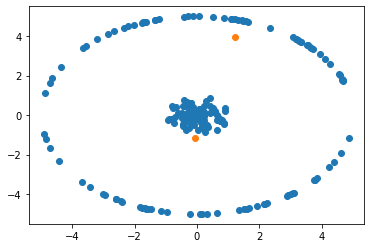

In [16]:
plt.scatter(conc_circ_x, conc_circ_y)
plt.scatter(list(zip(*conc_circ_model.cluster_centers_))[0], list(zip(*conc_circ_model.cluster_centers_))[1])

### $[0, 1]^2$ Random Sampling

In [37]:
square_x = np.random.rand(1000)
square_y = np.random.rand(1000)

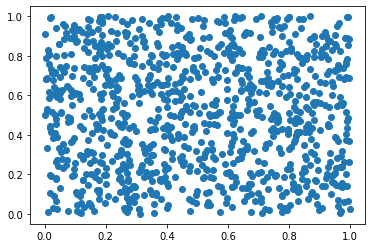

In [38]:
plt.scatter(square_x, square_y)

In [42]:
square_inertias = []
for i in range(1, 25):
    square_model = KMeans(n_clusters = i).fit(list(zip(square_x, square_y)))
    square_inertias.append(square_model.inertia_)

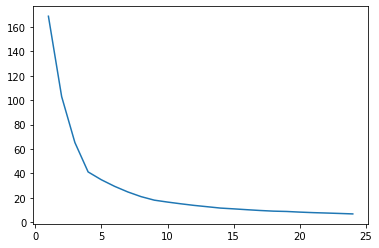

In [41]:
plt.plot(np.arange(1, 25), square_inertias)

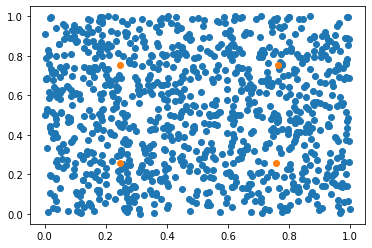

In [47]:
square_model = KMeans(n_clusters = 4).fit(list(zip(square_x, square_y)))
plt.scatter(square_x, square_y)
plt.scatter(list(zip(*square_model.cluster_centers_))[0], list(zip(*square_model.cluster_centers_))[1])